In [1]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd   
from sklearn.cluster import DBSCAN
from numpy import unique
from numpy import where
from matplotlib import pyplot

In [2]:
# Importing the dataset  
dataset = pd.read_csv('data.csv')   
dataset.drop(dataset.index[dataset['game'] == 'Alternating'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Sustained'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Selective'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Divided'], inplace = True)

dataset.drop(dataset.index[dataset['child_age'] == 4], inplace = True)
dataset.drop(dataset.index[dataset['child_age'] == 5], inplace = True)

display(dataset)

,id,child_gender,child_age,total_correct_responses,correct_responses,commission_errors,omission_errors,mean_reaction_time,total_duration,diagnosis,percentage_no_of_correct_responses,oer,cer,game
131,132,2,6,12,12,0,0,1041,89000,No,100.000000,0.000000,0.0,Focused
132,133,2,6,12,12,0,0,1298,87000,No,100.000000,0.000000,0.0,Focused
133,134,2,6,12,12,0,0,1080,86500,No,100.000000,0.000000,0.0,Focused
134,135,1,6,12,12,0,0,1284,88000,No,100.000000,0.000000,0.0,Focused
135,136,1,6,12,12,0,0,1140,88000,No,100.000000,0.000000,0.0,Focused
136,137,1,6,12,12,0,0,1125,90000,No,100.000000,0.000000,0.0,Focused
137,138,2,6,12,12,0,0,819,84000,No,100.000000,0.000000,0.0,Focused
138,139,2,6,12,12,0,0,783,89500,No,100.000000,0.000000,0.0,Focused
139,140,2,6,12,12,0,0,901,85000,No,100.000000,0.000000,0.0,Focused
140,141,2,6,12,12,0,0,976,88500,No,100.000000,0.000000,0.0,Focused


In [3]:
# extracting only 11-comission & 12-omission
x = dataset.iloc[:, [7, 10, 11]].values  
display(x)

array([[1041.        ,  100.        ,    0.        ],
       [1298.        ,  100.        ,    0.        ],
       [1080.        ,  100.        ,    0.        ],
       [1284.        ,  100.        ,    0.        ],
       [1140.        ,  100.        ,    0.        ],
       [1125.        ,  100.        ,    0.        ],
       [ 819.        ,  100.        ,    0.        ],
       [ 783.        ,  100.        ,    0.        ],
       [ 901.        ,  100.        ,    0.        ],
       [ 976.        ,  100.        ,    0.        ],
       [ 826.        ,   91.66666667,    8.33333333],
       [ 855.        ,  100.        ,    0.        ],
       [ 885.        ,  100.        ,    0.        ],
       [1031.        ,   91.66666667,    8.33333333],
       [1082.        ,  100.        ,    0.        ],
       [1061.        ,  100.        ,    0.        ],
       [1374.        ,  100.        ,    0.        ],
       [ 940.        ,  100.        ,    0.        ],
       [1071.        ,  100.

In [4]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df = scaler.fit_transform(x)

# statistics of scaled data
pd.DataFrame(new_df).describe()

display(new_df)


array([[-0.07666676,  0.37476584, -0.37476584],
       [ 1.44300705,  0.37476584, -0.37476584],
       [ 0.15394522,  0.37476584, -0.37476584],
       [ 1.36022326,  0.37476584, -0.37476584],
       [ 0.50873288,  0.37476584, -0.37476584],
       [ 0.42003596,  0.37476584, -0.37476584],
       [-1.3893811 ,  0.37476584, -0.37476584],
       [-1.60225369,  0.37476584, -0.37476584],
       [-0.90450463,  0.37476584, -0.37476584],
       [-0.46102006,  0.37476584, -0.37476584],
       [-1.3479892 , -1.79887605,  1.79887605],
       [-1.1765085 ,  0.37476584, -0.37476584],
       [-0.99911467,  0.37476584, -0.37476584],
       [-0.13579803, -1.79887605,  1.79887605],
       [ 0.16577148,  0.37476584, -0.37476584],
       [ 0.04159579,  0.37476584, -0.37476584],
       [ 1.89240475,  0.37476584, -0.37476584],
       [-0.67389265,  0.37476584, -0.37476584],
       [ 0.10072707,  0.37476584, -0.37476584],
       [ 0.28403403, -1.79887605,  1.79887605],
       [ 0.54421164,  0.37476584, -0.374

In [5]:
x = dataset.iloc[:, [2, 7, 10, 11]].copy()
x[['mean_reaction_time', 'percentage_no_of_correct_responses', 'oer']] = new_df
x.head()
x = x.to_numpy()
display(x)


array([[ 6.        , -0.07666676,  0.37476584, -0.37476584],
       [ 6.        ,  1.44300705,  0.37476584, -0.37476584],
       [ 6.        ,  0.15394522,  0.37476584, -0.37476584],
       [ 6.        ,  1.36022326,  0.37476584, -0.37476584],
       [ 6.        ,  0.50873288,  0.37476584, -0.37476584],
       [ 6.        ,  0.42003596,  0.37476584, -0.37476584],
       [ 6.        , -1.3893811 ,  0.37476584, -0.37476584],
       [ 6.        , -1.60225369,  0.37476584, -0.37476584],
       [ 6.        , -0.90450463,  0.37476584, -0.37476584],
       [ 6.        , -0.46102006,  0.37476584, -0.37476584],
       [ 6.        , -1.3479892 , -1.79887605,  1.79887605],
       [ 6.        , -1.1765085 ,  0.37476584, -0.37476584],
       [ 6.        , -0.99911467,  0.37476584, -0.37476584],
       [ 6.        , -0.13579803, -1.79887605,  1.79887605],
       [ 7.        ,  0.16577148,  0.37476584, -0.37476584],
       [ 7.        ,  0.04159579,  0.37476584, -0.37476584],
       [ 7.        ,  1.

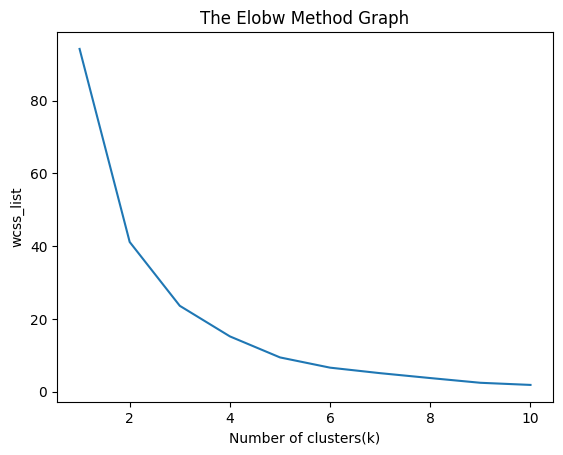

In [6]:
# Finding the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()

In [7]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  
print(y_predict)

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]


In [8]:
new_df = dataset.iloc[:, [2, 7, 10, 11]].copy()
new_df['clusters'] = y_predict
new_df.head()
display(new_df)

,child_age,mean_reaction_time,percentage_no_of_correct_responses,oer,clusters
131,6,1041,100.000000,0.000000,0
132,6,1298,100.000000,0.000000,0
133,6,1080,100.000000,0.000000,0
134,6,1284,100.000000,0.000000,0
135,6,1140,100.000000,0.000000,0
136,6,1125,100.000000,0.000000,0
137,6,819,100.000000,0.000000,0
138,6,783,100.000000,0.000000,0
139,6,901,100.000000,0.000000,0
140,6,976,100.000000,0.000000,0


In [9]:
# save the model to disk
import pickle
filename = 'modelfa2.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [10]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

print("Silhouette Coefficient: %0.3f" % silhouette_score(x, y_predict))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(x, y_predict))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(x, y_predict))

Silhouette Coefficient: 0.628
Calinski-Harabasz Index: 34.856
Davies-Bouldin Index: 0.641


# Cluster Analysis

## Cluster 1

In [11]:
len(new_df[new_df["clusters"] == 0])

25

In [12]:
cluster_0 = new_df[new_df["clusters"] == 0 ]
display(cluster_0)

,child_age,mean_reaction_time,percentage_no_of_correct_responses,oer,clusters
131,6,1041,100.0,0.0,0
132,6,1298,100.0,0.0,0
133,6,1080,100.0,0.0,0
134,6,1284,100.0,0.0,0
135,6,1140,100.0,0.0,0
136,6,1125,100.0,0.0,0
137,6,819,100.0,0.0,0
138,6,783,100.0,0.0,0
139,6,901,100.0,0.0,0
140,6,976,100.0,0.0,0


In [13]:
cluster_0 = new_df[new_df["clusters"] == 0 ]

maxVal = cluster_0['mean_reaction_time'].max()
minVal = cluster_0['mean_reaction_time'].min()

print("mean_reaction_time min - ", minVal)
print("mean_reaction_time max - ", maxVal)
print()

maxVal = cluster_0['percentage_no_of_correct_responses'].max()
minVal = cluster_0['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_0['oer'].max()
minVal = cluster_0['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)

mean_reaction_time min -  783
mean_reaction_time max -  1374

percentage_no_of_correct_responses min -  100.0
percentage_no_of_correct_responses max -  100.0

oer min -  0.0
oer max -  0.0


## Cluster 2

In [14]:
len(new_df[new_df["clusters"] == 1])

4

In [15]:
cluster_1 = new_df[new_df["clusters"] == 1 ]
display(cluster_1)

,child_age,mean_reaction_time,percentage_no_of_correct_responses,oer,clusters
141,6,826,91.666667,8.333333,1
144,6,1031,91.666667,8.333333,1
150,7,1102,91.666667,8.333333,1
152,7,792,83.333333,16.666667,1


In [16]:
cluster_1 = new_df[new_df["clusters"] == 1 ]

maxVal = cluster_1['mean_reaction_time'].max()
minVal = cluster_1['mean_reaction_time'].min()

print("mean_reaction_time min - ", minVal)
print("mean_reaction_time max - ", maxVal)
print()

maxVal = cluster_1['percentage_no_of_correct_responses'].max()
minVal = cluster_1['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_1['oer'].max()
minVal = cluster_1['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)

mean_reaction_time min -  792
mean_reaction_time max -  1102

percentage_no_of_correct_responses min -  83.33333333
percentage_no_of_correct_responses max -  91.66666667

oer min -  8.333333333
oer max -  16.66666667
